In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Activation,Dropout
from keras.utils import to_categorical
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sbn
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import metrics

In [ ]:
data_directory = "My Drive/Veri/"

In [ ]:
no_tumor = os.listdir(data_directory + "no/")
yes_tumor = os.listdir(data_directory + "yes/")

In [ ]:
path = "no0.jpg"
dataset=[]
label=[]
Input_Size = 64

In [ ]:
for i, image_name in enumerate(no_tumor):
  if(image_name.split(".")[1] == "jpg"):
    img = cv2.imread(data_directory+ "no/" +image_name)
    img = Image.fromarray(img,"RGB")
    img = img.resize((Input_Size,Input_Size))
    img = np.array(img)
    dataset.append(img)
    label.append(0)

In [ ]:
for i, image_name in enumerate(yes_tumor):
  if(image_name.split(".")[1] == "jpg"):
    img = cv2.imread(data_directory + "yes/" + image_name)
    img = Image.fromarray(img,"RGB")
    img = img.resize((Input_Size,Input_Size))
    dataset.append(np.array(img))
    label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(dataset,label,test_size=0.3,train_size=0.7,random_state=0)

In [ ]:
x_train.shape

(2100, 64, 64, 3)

In [ ]:
X_train=x_train.reshape(x_train.shape[0],-1).T
X_test=x_test.reshape(x_test.shape[0],-1).T

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = np.array(X_train)
Y_train = np.array(y_train)
X_test = np.array(X_test)
Y_test = np.array(y_test)

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = - np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    diffAY = A - Y
    dw = np.dot(X, diffAY.T) / m
    db = np.sum(diffAY) / m
    return dw, db, cost

def initialize_with_zeros(dim):
    return  np.zeros([dim, 1]), 0.0

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = [None] * num_iterations
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs[i] = cost
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return w, b, costs

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[:, i] = (A[:, i] > 0.5) * 1
    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1500, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    w, b, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("Eğitim Kümesi Doğruluk Oranı: {}%".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("Test Kümesi Doğruluk Oranı: {}%".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
    return Y_prediction_test, costs

In [ ]:
Y_prediction_test, costs = model(X_train, Y_train, X_test, Y_test, num_iterations = 3000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.538338
Cost after iteration 200: 0.442744
Cost after iteration 300: 0.393579
Cost after iteration 400: 0.361304
Cost after iteration 500: 0.342236
Cost after iteration 600: 0.326572
Cost after iteration 700: 0.312718
Cost after iteration 800: 0.300326
Cost after iteration 900: 0.289146
Cost after iteration 1000: 0.278988
Cost after iteration 1100: 0.269701
Cost after iteration 1200: 0.261166
Cost after iteration 1300: 0.253287
Cost after iteration 1400: 0.245983
Cost after iteration 1500: 0.239188
Cost after iteration 1600: 0.232846
Cost after iteration 1700: 0.226907
Cost after iteration 1800: 0.221332
Cost after iteration 1900: 0.216084
Cost after iteration 2000: 0.211134
Cost after iteration 2100: 0.206453
Cost after iteration 2200: 0.202019
Cost after iteration 2300: 0.197811
Cost after iteration 2400: 0.193810
Cost after iteration 2500: 0.190000
Cost after iteration 2600: 0.186366
Cost after iteration 2700: 0.182895
Cost

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_prediction_test.T)

array([[460,  33],
       [ 29, 378]])

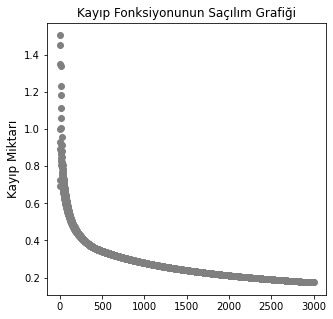

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x = range(len(costs)), y =costs , color='gray')
plt.title('Kayıp Fonksiyonunun Saçılım Grafiği', fontsize=12)
plt.ylabel('Kayıp Miktarı', fontsize=12)
plt.show()

In [ ]:
a = Y_prediction_test.transpose()[:,0]
a.shape

(900,)

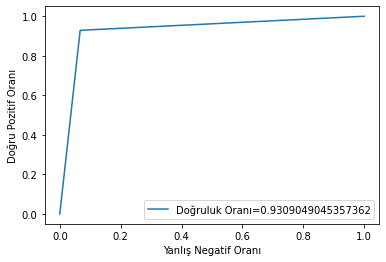

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  a)
auc = metrics.roc_auc_score(y_test, a)

plt.plot(fpr,tpr,label="Doğruluk Oranı="+str(auc))
plt.ylabel('Doğru Pozitif Oranı')
plt.xlabel('Yanlış Negatif Oranı')
plt.legend(loc=4)
plt.show()